# Identifying handwritten digits using Dimensionality Reduction

# Packages used
- Tensorflow
- Keras
- Seaborn
- Pandas
- Sckit learn

# Models:

PCA
Fast ICA
t-SNE

# Importing the libraries from the packages 

In [1]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense,Dropout,Activation, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
from keras.datasets import mnist
import pandas as pd
import numpy as np
import seaborn as sns
from time import time
from sklearn import model_selection
%matplotlib inline

Using TensorFlow backend.


# Loading the MNIST dataset into training and test variables

In [2]:
(X, Y), (Xtest, Ytest) = mnist.load_data()
img_width, img_height = X[0].shape

# To print the shape/dimension of the training and testing vectors:

In [3]:
print('X: ' + str(X.shape))
print('Y: ' + str(Y.shape))
print('Xtest:  '  + str(Xtest.shape))
print('Ytest:  '  + str(Ytest.shape))

X: (60000, 28, 28)
Y: (60000,)
Xtest:  (10000, 28, 28)
Ytest:  (10000,)


# From this we can conclude the following about MNIST dataset :

The training set contained 60k images and the testing set contains 10k images.
The input vector is of the dimension [60000 X 28 X 28].
The training output vector is of the dimension [60000 X 1].
Each individual input vector is of the dimension [28 X 28].
Each individual output vector is of the dimension [1].

# Convert into Tensors by dividing by 255

In [4]:
X = X/255
Xtest = Xtest/255

# The input data is plotted.

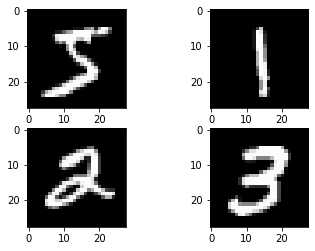

In [5]:
plt.subplot(221)
plt.imshow(X[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X[8], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X[5], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X[7], cmap=plt.get_cmap('gray'))
plt.show()


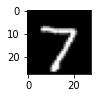

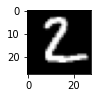

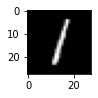

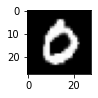

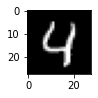

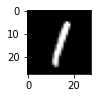

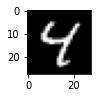

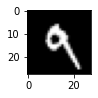

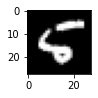

In [6]:
from matplotlib import pyplot
for i in range(9):  
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(Xtest[i], cmap=pyplot.get_cmap('gray'))
    pyplot.show()

# The tensor is reshaped into a matrix and scaled about to increase efficiency and classification accuracy(Normalization)

In [7]:
X = X.reshape(X.shape[0], img_width*img_height)
X -= X.mean(axis=0)

# Without Dimensionality Reduction

In [10]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
kfold = KFold(n_splits=10, random_state=7,shuffle=True)
cv_results = cross_val_score(lr, X[0:5000], Y[0:5000], cv=kfold, scoring='accuracy')
print(cv_results.mean())
    

NameError: name 'KFold' is not defined

In [17]:
def scatter_plot(X,Y,c1,c2,N):
  label1 = f'Component {c1}'
  label2 = f'Component {c2}'
  df = pd.DataFrame({label1:X[:N, c1], label2:X[:N,c2], 'label':Y[:N]})
  sns.lmplot(data = df, x = label1, y=label2, fit_reg=False,
             hue='label', scatter_kws={'alpha':0.5})

# The input is transformed to fit into the PCA model and passed through 5 classifiers and accuracy results are stored in the list. 

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
X_reduced = pca.fit_transform(X)

In [12]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTREE', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
results = []
names = []
for name, model in models:
 kfold = KFold(n_splits=10, random_state=7, shuffle=True)
 cv_results = cross_val_score(model, X_reduced, Y, cv=kfold, scoring='accuracy')
 results.append(cv_results)
 msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
 print(msg)

LR: 0.801917 (0.003689)
LDA: 0.767633 (0.002844)
KNN: 0.931567 (0.002718)
DTREE: 0.825450 (0.003317)
NB: 0.770217 (0.004675)


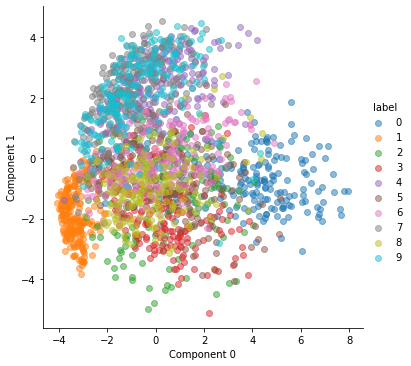

In [15]:
scatter_plot(X_reduced, Y, 0, 1, 2000)

Now the input data is transformed to fit into the ICA model and then plotted to observe that the components in the data are still overlapping and have not been reduced efficiently .


In [19]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTREE', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
results = []
names = []
for name, model in models:
 kfold = KFold(n_splits=10, random_state=7,shuffle=True)
 cv_results = cross_val_score(model, X_ICA_reduced, Y, cv=kfold, scoring='accuracy')
 results.append(cv_results)
 msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
 print(msg)

NameError: name 'X_ICA_reduced' is not defined

In [20]:
scatter_plot(X_ICA_reduced, Y, 0, 1, 2000)

NameError: name 'X_ICA_reduced' is not defined

In [ ]:
from sklearn.decomposition import FastICA
ICA = FastICA(n_components=10, random_state=12)
X_ICA_reduced = ICA.fit_transform(X)
plt.figure(figsize=(8,8))
plt.title('ICA Components')
plt.scatter(X_ICA_reduced[:,0], X_ICA_reduced[:,9])
plt.scatter(X_ICA_reduced[:,1], X_ICA_reduced[:,8])
plt.scatter(X_ICA_reduced[:,2], X_ICA_reduced[:,7])
plt.scatter(X_ICA_reduced[:,3], X_ICA_reduced[:,6])
plt.scatter(X_ICA_reduced[:,4], X_ICA_reduced[:,5])
plt.scatter(X_ICA_reduced[:,5], X_ICA_reduced[:,4])
plt.scatter(X_ICA_reduced[:,6], X_ICA_reduced[:,3])
plt.scatter(X_ICA_reduced[:,7], X_ICA_reduced[:,2])
plt.scatter(X_ICA_reduced[:,8], X_ICA_reduced[:,1])
plt.scatter(X_ICA_reduced[:,9], X_ICA_reduced[:,0])

In [21]:
from sklearn.manifold import TSNE 
N=10000
import numpy as np
np.random.seed(0)
tsne = TSNE()
X_tsne = tsne.fit_transform(X[:N])

In [22]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTREE', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
results = []
names = []
for name, model in models:
 kfold = KFold(n_splits=10, random_state=7,shuffle=True)
 cv_results = cross_val_score(model, X_tsne, Y[0:10000], cv=kfold, scoring='accuracy')
 results.append(cv_results)
 msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
 print(msg)

LR: 0.889300 (0.006017)
LDA: 0.880000 (0.008521)
KNN: 0.948800 (0.004792)
DTREE: 0.936000 (0.004648)
NB: 0.881700 (0.008319)


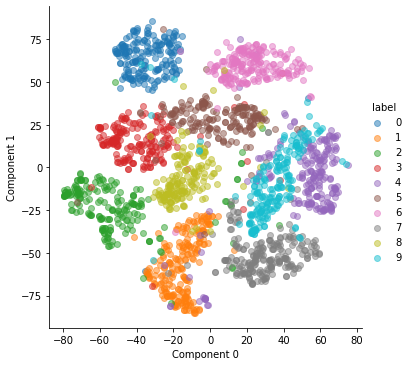

In [23]:
scatter_plot(X_tsne, Y, 0, 1, 2000)